# Customer segmentation

Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits. Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment

### Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
train.head(50)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


### Exploratory data analysis

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [38]:
train.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

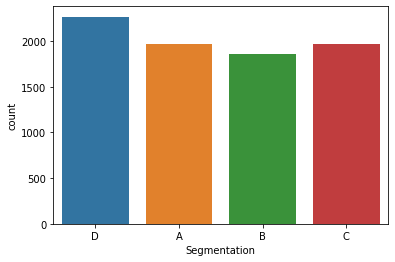

In [39]:
sns.countplot(x='Segmentation', data=train)

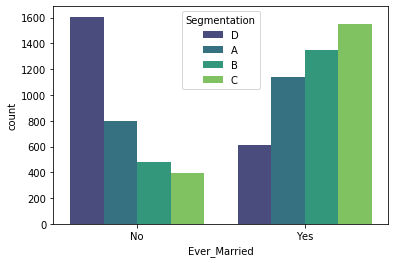

In [40]:
sns.countplot(x='Ever_Married', data=train, hue='Segmentation',palette='viridis')

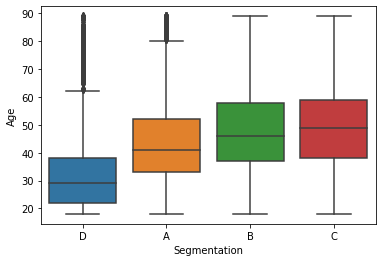

In [41]:
sns.boxplot(x='Segmentation', y='Age', data=train)

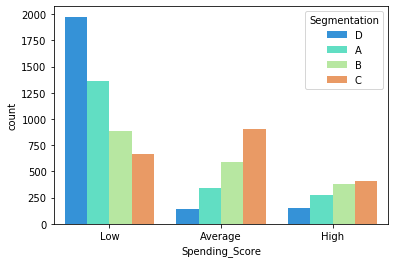

In [45]:
sns.countplot(x='Spending_Score', data=train, hue='Segmentation' ,palette='rainbow')

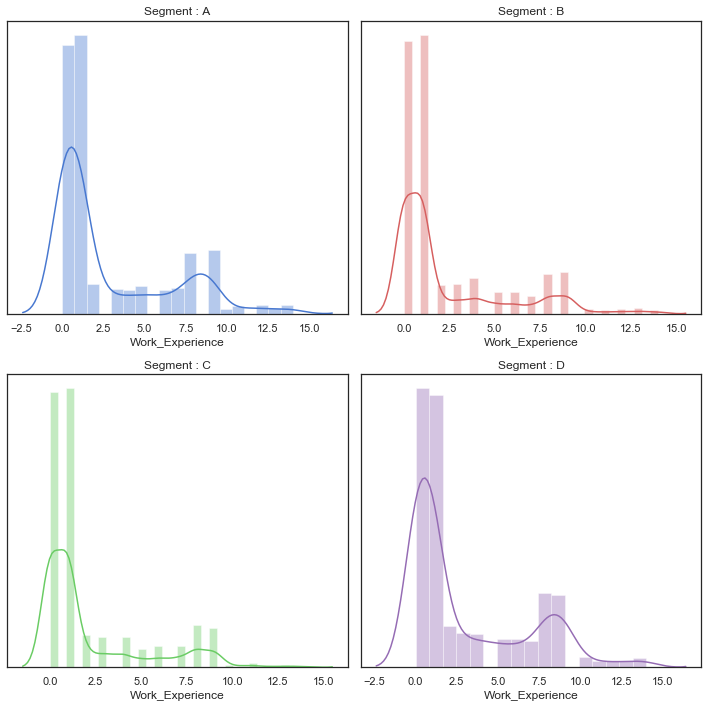

In [46]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.distplot(df[df.Segmentation =='A']["Work_Experience"],  color="b", ax=axes[0, 0]).set_title('Segment : A')

sns.distplot(df[df.Segmentation =='B']["Work_Experience"],   color="r", ax=axes[0, 1]).set_title('Segment : B')

sns.distplot(df[df.Segmentation =='C']["Work_Experience"],  color="g", ax=axes[1, 0]).set_title('Segment : C')

sns.distplot(df[df.Segmentation =='D']["Work_Experience"], color="m", ax=axes[1, 1]).set_title('Segment : D')

plt.setp(axes, yticks=[])
plt.tight_layout()

### Data preprocessing

In [29]:
train_copy  = train.copy()
test_copy = test.copy()
train_copy['train'] = 1
test_copy['train'] = 0

df = pd.concat([train_copy, test_copy], axis = 0)

In [30]:
df.drop(columns=df.columns[-1], axis=1, inplace=True)

##### Missing values - Approach 1

In [7]:
df_mv = df.copy()

In [8]:
df_mv.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
train                 0
dtype: int64

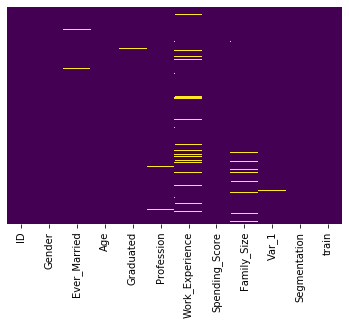

In [9]:
sns.heatmap(df_mv.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df_mv.loc[(df_mv['Family_Size'].isnull() == True), 'Family_Size'] = df_mv['Family_Size'].mean()

In [11]:
df_mv['Work_Experience'].fillna(method='bfill',inplace=True)
df_mv['Var_1'].fillna(method='bfill',inplace=True)
df_mv['Graduated'].fillna(method='bfill',inplace=True)
df_mv['Ever_Married'].fillna(method='bfill',inplace=True)
df_mv.drop('ID', axis=1,inplace=True)

In [12]:
df_mv.dropna(inplace=True)

In [13]:
df_mv = pd.get_dummies(columns = ['Gender', 'Ever_Married', 'Graduated','Profession', 'Spending_Score', 'Var_1'],data=df_mv, drop_first=True)

##### missing values

In [8]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
label_enc = {}

for col in cat_cols:
    df[col] = df[col].astype(str)
    enc = LabelEncoder().fit(df[col])
    df[col] = enc.transform(df[col])
    label_enc[col] = enc

In [32]:
df.head(50)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train
0,462809,1,0,22,0,5,1.0,2,4.0,3,D,1
1,462643,0,1,38,1,2,NaN,0,3.0,3,A,1
2,466315,0,1,67,1,2,1.0,2,1.0,5,B,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,B,1
4,462669,0,1,40,1,3,NaN,1,6.0,5,A,1
5,461319,1,1,56,0,0,0.0,0,2.0,5,C,1
6,460156,1,0,32,1,5,1.0,2,3.0,5,C,1
7,464347,0,0,33,1,5,1.0,2,3.0,5,D,1
8,465015,0,1,61,1,2,0.0,2,3.0,6,D,1
9,465176,0,1,55,1,0,1.0,0,4.0,5,C,1


In [22]:
cats = ['Gender', 'Ever_Married','Graduated','Profession','Spending_Score','Var_1']
df = pd.get_dummies(df, columns = cats)

In [11]:
def id_features(data):
    df = data.copy()
    df['week'] = df['ID']%7
    df['month'] = df['ID']%30
    df['year'] = df['ID']%365
    df['quarter'] = df['ID']%90
    return df

In [12]:
df = id_features(df)

In [16]:
df.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,train,Gender_0,Gender_1,Ever_Married_0,Ever_Married_1,...,Var_1_2,Var_1_3,Var_1_4,Var_1_5,Var_1_6,Var_1_7,week,month,year,quarter
0,462809,22,1.0,4.0,D,1,0,1,1,0,...,0,1,0,0,0,0,4,29,354,29
1,462643,38,NaN,3.0,A,1,1,0,0,1,...,0,1,0,0,0,0,6,13,188,43
2,466315,67,1.0,1.0,B,1,1,0,0,1,...,0,0,0,1,0,0,3,25,210,25
3,461735,67,0.0,2.0,B,1,0,1,0,1,...,0,0,0,1,0,0,1,5,10,35
4,462669,40,NaN,6.0,A,1,1,0,0,1,...,0,0,0,1,0,0,4,9,214,69


### Train test split 

##### without missing values

In [15]:
train_2 = df_mv.loc[df_mv['train'] == 1]
test_2 = df_mv.loc[df_mv['train'] == 0]
Xcols = df_mv.drop(['Segmentation', 'train'], axis = 1).columns
ycol = 'Segmentation'

In [16]:
X_train2 = train_2[Xcols]
y_train2 = train_2[ycol]

X_test2 = test_2[Xcols]
y_test2 = test_2[ycol]

##### with missing values

In [29]:
train_copy = df.loc[df['train'] == 1]
test_copy = df.loc[df['train'] == 0]
Xcols = df.drop(['Segmentation', 'train'], axis = 1).columns
ycol = 'Segmentation'

In [30]:
X_train = train_copy[Xcols]
y_train = train_copy[ycol]

X_test = test_copy[Xcols]
y_test = test_copy[ycol]

## Model building

#### Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=600)

In [19]:
rfc.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
predictions_rfc = rfc.predict(X_test2)

#### Light GBM model

In [31]:
import lightgbm as lgb

In [32]:
model = lgb.LGBMClassifier(n_estimators=300, max_features = .85, max_depth = 15, learning_rate = 1.1).fit(X_train, y_train)

In [33]:
pred = model.predict(X_test)

### Model evaluation

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

#### Random forest 

In [22]:
print(classification_report(y_test2,predictions_rfc))

              precision    recall  f1-score   support

           A       0.69      0.67      0.68       652
           B       0.60      0.58      0.59       593
           C       0.70      0.73      0.71       620
           D       0.81      0.83      0.82       724

    accuracy                           0.71      2589
   macro avg       0.70      0.70      0.70      2589
weighted avg       0.71      0.71      0.71      2589



#### Light GBM

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           A       0.94      0.93      0.93       666
           B       0.94      0.94      0.94       597
           C       0.95      0.95      0.95       625
           D       0.96      0.97      0.96       739

    accuracy                           0.95      2627
   macro avg       0.95      0.95      0.95      2627
weighted avg       0.95      0.95      0.95      2627



In [35]:
print(confusion_matrix(y_test,pred))

[[619  15  11  21]
 [ 21 562   9   5]
 [ 11  17 593   4]
 [ 11   3   9 716]]


In [32]:
import pickle

In [33]:
Pkl_Filename = "LGBM.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [34]:
with open(Pkl_Filename, 'rb') as file:  
    LGBM = pickle.load(file)

LGBM

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=1.1, max_depth=15,
               max_features=0.85, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=300, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)